<a href="https://colab.research.google.com/github/vaghemanth/EDA/blob/main/Aerofit_treadmill_EDA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1Ida3R8D69AROqz9ZrXFZbEsQM4LYElEr" -O aerofit_treadmill.csv

--2024-12-23 13:09:36--  https://drive.google.com/uc?export=download&id=1Ida3R8D69AROqz9ZrXFZbEsQM4LYElEr
Resolving drive.google.com (drive.google.com)... 74.125.204.139, 74.125.204.138, 74.125.204.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Ida3R8D69AROqz9ZrXFZbEsQM4LYElEr&export=download [following]
--2024-12-23 13:09:36--  https://drive.usercontent.google.com/download?id=1Ida3R8D69AROqz9ZrXFZbEsQM4LYElEr&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [application/octet-stream]
Saving to: ‘aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-

# Basics

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

from matplotlib.colors import LinearSegmentedColormap

colors = ["red", "white", "green"]
cmap = LinearSegmentedColormap.from_list("rg", colors, N=256)

df = pd.read_csv('aerofit_treadmill.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


# Missing values

In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


No missing values

In [ ]:
# Total Miles run after using the Aero fit products
total_miles = df["Miles"].sum()
print(f"Total Miles Ran: {total_miles}")

Total Miles Ran: 18575


List of Products

In [ ]:
list(df["Product"].unique())

['KP281', 'KP481', 'KP781']

In [ ]:
df_edu = df['Education'].value_counts()
print(df_edu)

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64


Most people who are using the products are between 14-18 Years in Education

In [ ]:
df_gen = df['Gender'].value_counts()
print(df_gen)

Gender
Male      104
Female     76
Name: count, dtype: int64


Male people using the products more than Female

In [ ]:
df_ms = df['MaritalStatus'].value_counts()
print(df_ms)

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


Married People using the products more than Single

In [ ]:
df_fit = df['Fitness'].value_counts()
print(df_fit)

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64


In [ ]:
ds_product = df['Product'].value_counts()
ds_product = ds_product.reset_index()
print(ds_product)

  Product  count
0   KP281     80
1   KP481     60
2   KP781     40


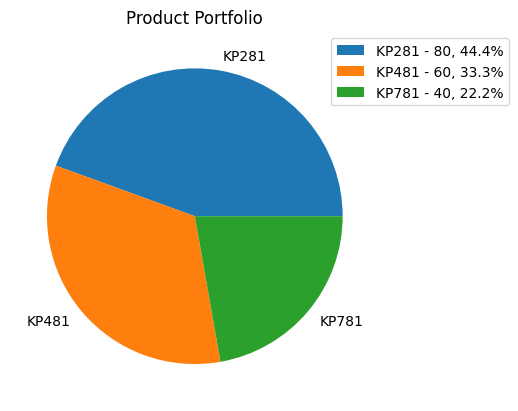

In [ ]:
plt.title("Product Portfolio")
plt.pie(ds_product["count"], labels=ds_product["Product"])
labels = [f'{l} - {s}, {p*100:0.1f}%' for l, s,p in zip(ds_product["Product"],ds_product["count"], ds_product["count"]/ds_product["count"].sum())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

In [ ]:
ds_gender = df['Gender'].value_counts()
print(ds_gender)
df_gender = ds_gender.reset_index()
print(df_gender)

Gender
Male      104
Female     76
Name: count, dtype: int64
   Gender  count
0    Male    104
1  Female     76


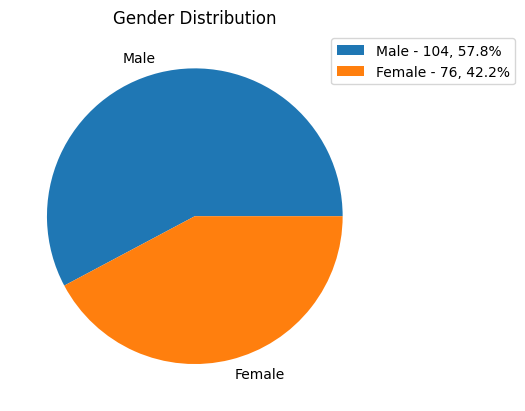

In [ ]:
#type_labels = ["Male", "Female"]
plt.title("Gender Distribution")
plt.pie(df_gender["count"], labels=df_gender["Gender"])
labels = [f'{l} - {s}, {p*100:0.1f}%' for l, s,p in zip(df_gender["Gender"],df_gender["count"], df_gender["count"]/df_gender["count"].sum())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

In [ ]:
#MaritalStatus
ds_MS = df['MaritalStatus'].value_counts()
print(ds_MS)
df_MS = ds_MS.reset_index()
print(df_MS)

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
  MaritalStatus  count
0     Partnered    107
1        Single     73


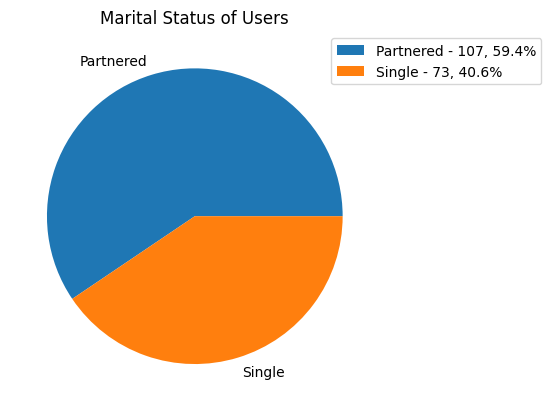

In [ ]:
plt.title("Marital Status of Users")
plt.pie(df_MS["count"], labels=df_MS["MaritalStatus"])
labels = [f'{l} - {s}, {p*100:0.1f}%' for l, s,p in zip(df_MS["MaritalStatus"],df_MS["count"], df_MS["count"]/df_MS["count"].sum())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

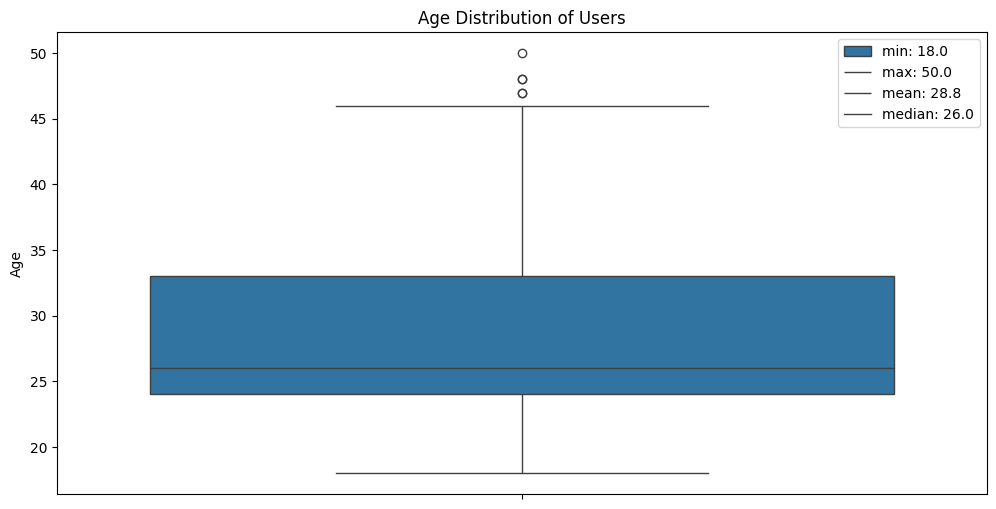

In [ ]:
#Age group of the individuals using Aerofit products
plt.figure(figsize=(12,6))
plt.title("Age Distribution of Users")
sns.boxplot(data=df,y="Age")
labels = [f'{l}: {s:0.1f}' for l, s in df["Age"].aggregate(['min','max','mean',"median"]).items()]
plt.legend(loc='upper right', labels=labels)
plt.show()

In [ ]:
df["Age"].aggregate(['min','max','mean',"median"])

,Age
min,18.000000
max,50.000000
mean,28.788889
median,26.000000


Quartile ranges of Ages of Users

In [ ]:
df["Age"].quantile([0.25,0.5,0.75])

,Age
0.25,24.0
0.50,26.0
0.75,33.0


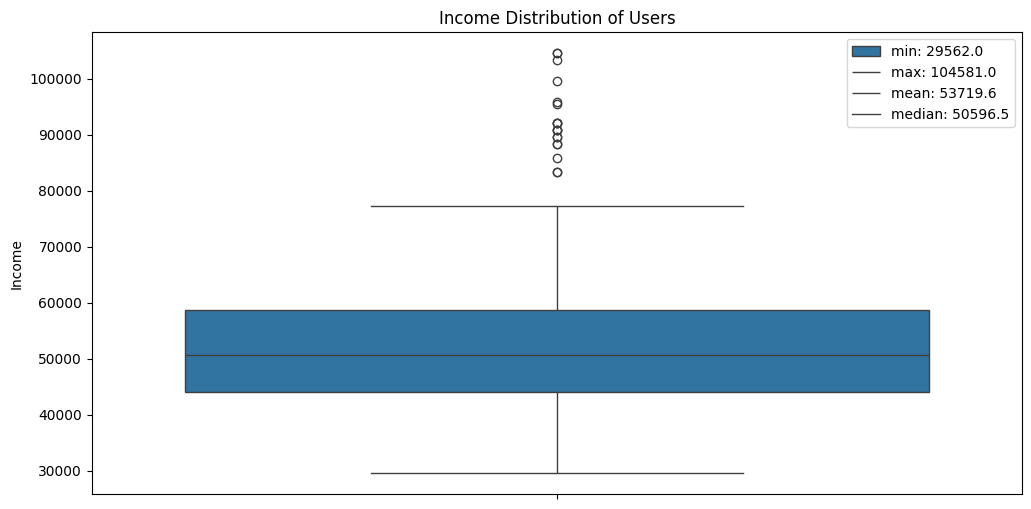

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Income Distribution of Users")
sns.boxplot(data=df,y="Income")
labels = [f'{l}: {s:0.1f}' for l, s in df["Income"].aggregate(['min','max','mean',"median"]).items()]
plt.legend(loc='upper right', labels=labels)
plt.show()

In [ ]:
df["Income"].aggregate(['min','max','mean',"median"])

,Income
min,29562.000000
max,104581.000000
mean,53719.577778
median,50596.500000


Quartile ranges of Incomes of Users

In [ ]:
df["Income"].quantile([0.25,0.5,0.75])

,Income
0.25,44058.75
0.50,50596.50
0.75,58668.00


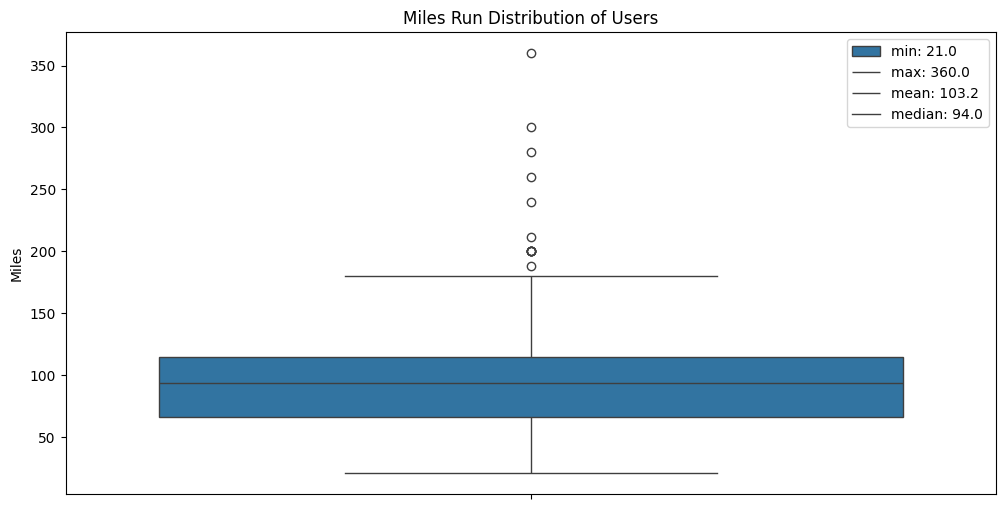

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Miles Run Distribution of Users")
sns.boxplot(data=df,y="Miles")
labels = [f'{l}: {s:0.1f}' for l, s in df["Miles"].aggregate(['min','max','mean',"median"]).items()]
plt.legend(loc='upper right', labels=labels)
plt.show()

In [ ]:
df["Miles"].aggregate(['min','max','mean',"median"])

,Miles
min,21.000000
max,360.000000
mean,103.194444
median,94.000000


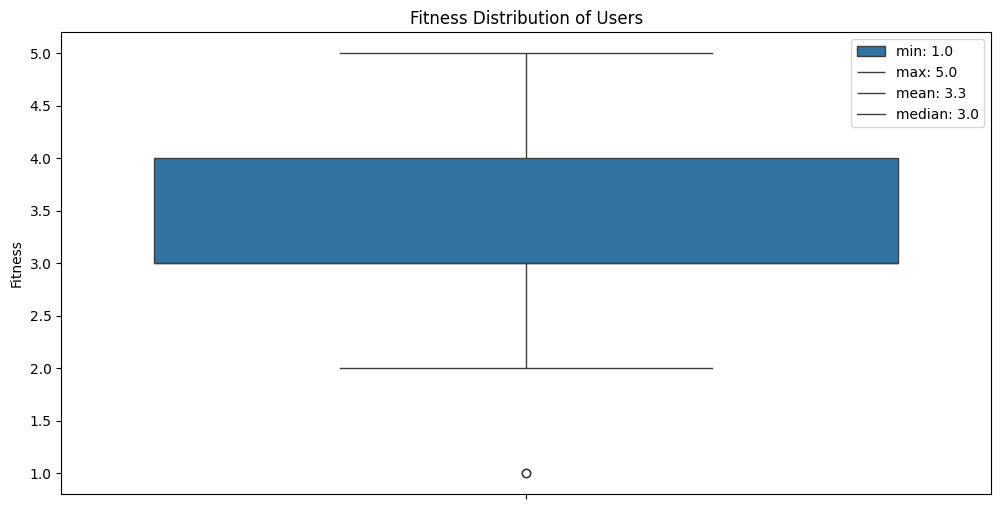

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Fitness Distribution of Users")
sns.boxplot(data=df,y="Fitness")
labels = [f'{l}: {s:0.1f}' for l, s in df["Fitness"].aggregate(['min','max','mean',"median"]).items()]
plt.legend(loc='upper right', labels=labels)
plt.show()

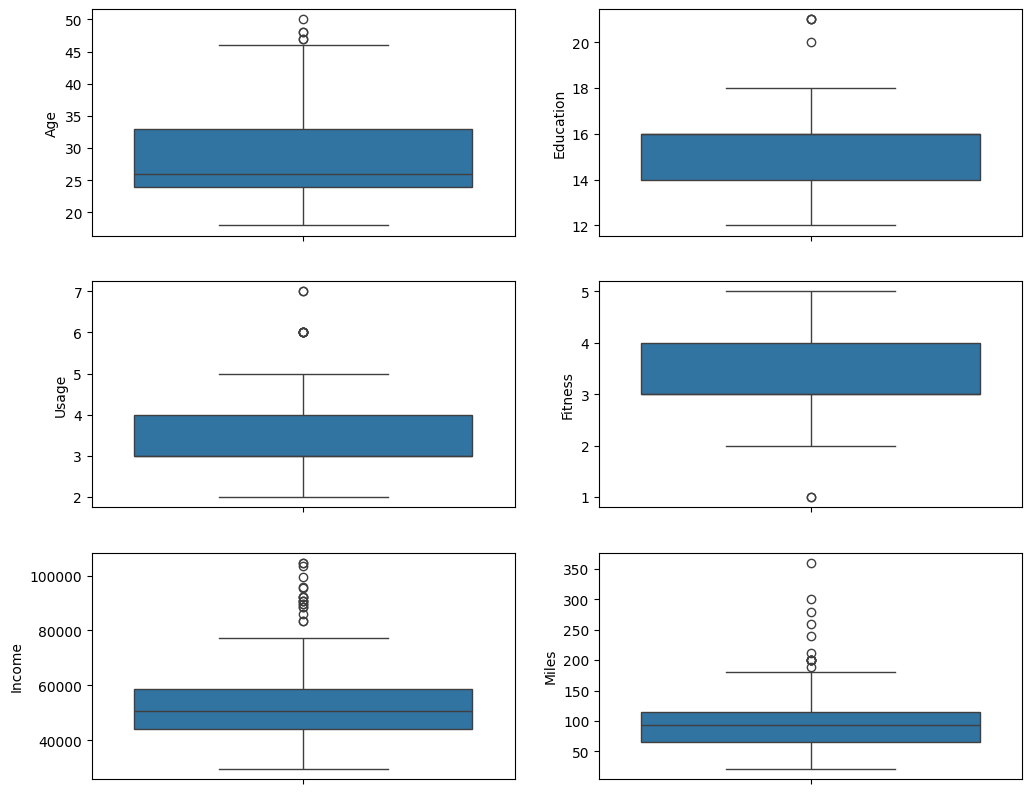

In [ ]:
#sns.boxplot
variables = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
row = 0
col = 0
for var in variables:
  sns.boxplot(df, y = var, ax=axis[row,col])
  col +=1
  if(col > 1):
    row +=1
    col = 0

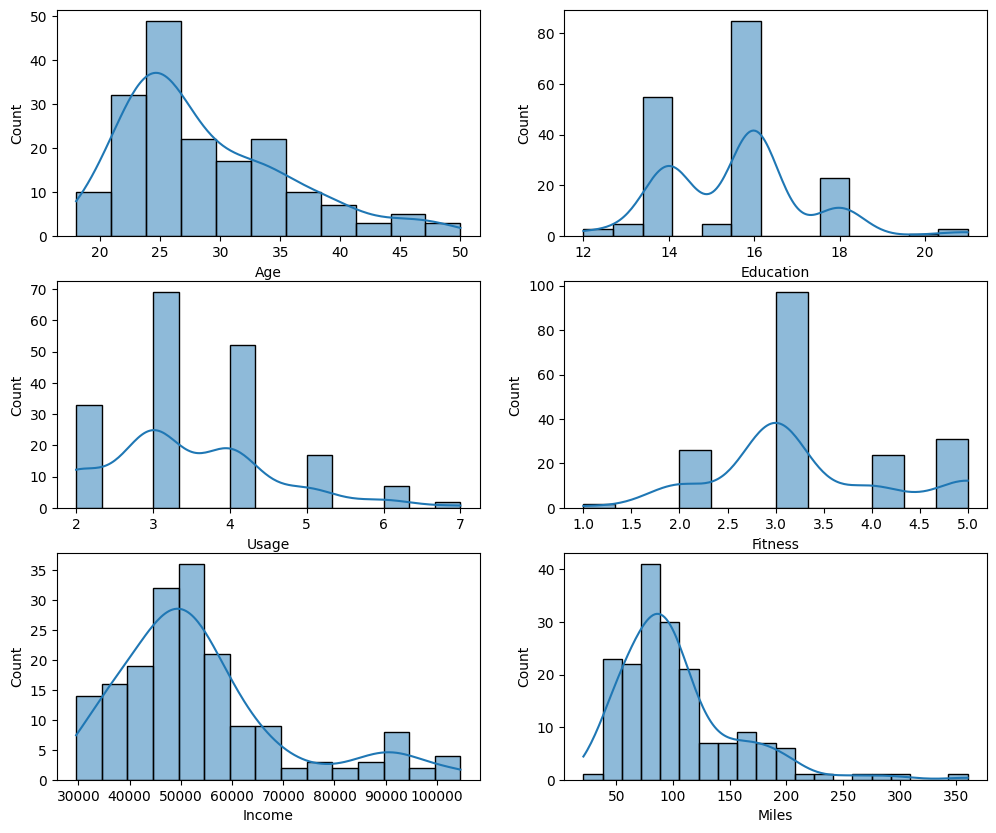

In [ ]:
#sns.histplot
variables = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
row = 0
col = 0
for var in variables:
  sns.histplot(df, x = var, kde=True, ax=axis[row,col])
  col +=1
  if(col > 1):
    row +=1
    col = 0

<Axes: xlabel='Product', ylabel='Age'>

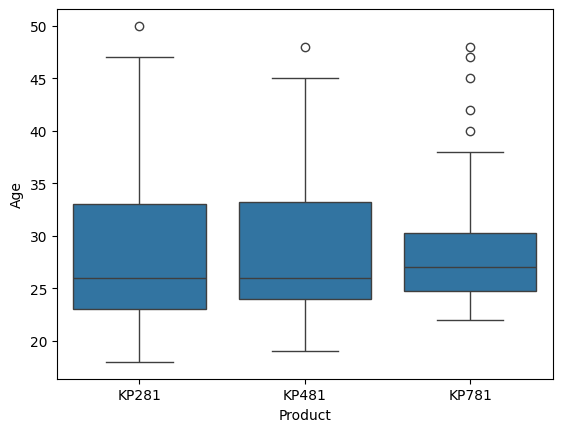

In [ ]:
sns.boxplot(data=df, x='Product', y="Age")

In [ ]:
df[df["Product"] == "KP281"]["Age"].aggregate(['min','max','mean',"median"])

,Age
min,18.00
max,50.00
mean,28.55
median,26.00


Quartile ranges for KP281

In [ ]:
df[df["Product"] == "KP281"]["Age"].quantile([0.25,0.5,0.75])

,Age
0.25,23.0
0.50,26.0
0.75,33.0


In [ ]:
df[df["Product"] == "KP481"]["Age"].aggregate(['min','max','mean',"median"])

,Age
min,19.0
max,48.0
mean,28.9
median,26.0


Quartile ranges for KP481

In [ ]:
df[df["Product"] == "KP481"]["Age"].quantile([0.25,0.5,0.75])

,Age
0.25,24.00
0.50,26.00
0.75,33.25


In [ ]:
df[df["Product"] == "KP781"]["Age"].aggregate(['min','max','mean',"median"])

,Age
min,22.0
max,48.0
mean,29.1
median,27.0


Quartile ranges for KP781

In [ ]:
#Quartile ranges for KP781
df[df["Product"] == "KP781"]["Age"].quantile([0.25,0.5,0.75])

,Age
0.25,24.75
0.50,27.00
0.75,30.25


Probability of Buying KP281 product when customer is Male and Single is = 44.19%
Probability of Buying KP481 product when customer is Male and Single is = 23.26%
Probability of Buying KP781 product when customer is Male and Single is = 32.56%


Probability of Buying KP281 product when customer is Male and Partnered is = 34.43%
Probability of Buying KP481 product when customer is Male and Partnered is = 34.43%
Probability of Buying KP781 product when customer is Male and Partnered is = 31.15%


Probability of Buying KP281 product when customer is Female and Single is = 43.33%
Probability of Buying KP481 product when customer is Female and Single is = 46.67%
Probability of Buying KP781 product when customer is Female and Single is = 10.0%


Probability of Buying KP281 product when customer is Female and Partnered is = 58.7%
Probability of Buying KP481 product when customer is Female and Partnered is = 32.61%
Probability of Buying KP781 product when customer is Female and Partnered is = 8

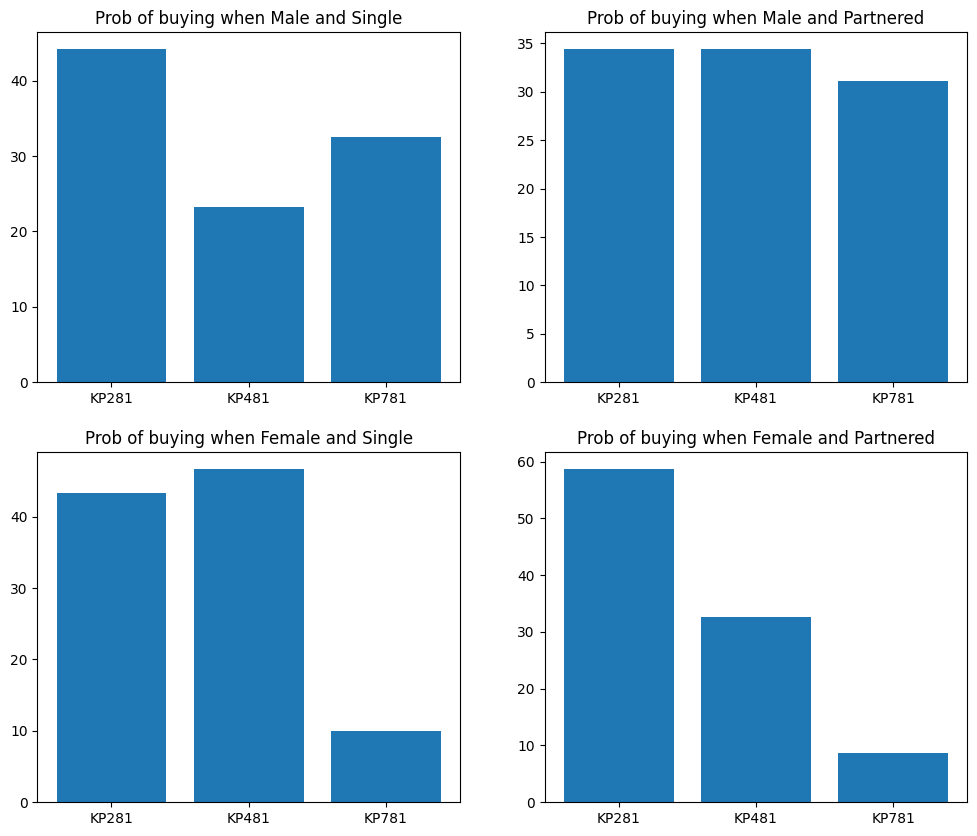

In [ ]:
var_gen = ["Male", "Female"]
var_ms =["Single", "Partnered"]
var_prod = ["KP281", "KP481", "KP781"]

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

row = 0
col = 0

for var_g in var_gen:
  for var_m in var_ms:
    df_ms = df[(df['Gender']==var_g)&(df['MaritalStatus']==var_m)]
    var_KP281 = round(len(df_ms[df_ms['Product']=='KP281'])/len(df_ms)*100,2)
    var_KP481 = round(len(df_ms[df_ms['Product']=='KP481'])/len(df_ms)*100,2)
    var_KP781 = round(len(df_ms[df_ms['Product']=='KP781'])/len(df_ms)*100,2)
    var_prob = [var_KP281,var_KP481,var_KP781]
    print(f"Probability of Buying KP281 product when customer is {var_g} and {var_m} is = {var_KP281}%")
    print(f"Probability of Buying KP481 product when customer is {var_g} and {var_m} is = {var_KP481}%")
    print(f"Probability of Buying KP781 product when customer is {var_g} and {var_m} is = {var_KP781}%")
    print("\n")
    axis[row,col].bar(var_prod, var_prob)
    axis[row,col].set_title(f"Prob of buying when {var_g} and {var_m}")
    col +=1
    if(col > 1):
      row +=1
      col = 0



* KP281 is popular among  Male and Single Population
* KP281 and KP481 are equally popular among Male and Partnered
* KP481 is popular among  Female and Single Population
* KP281 is popular among  Female and Single Partnered

Overall, KP281 and KP481 are the favorites among the three

# Conditional Probabilities

In [ ]:
# Contingency table for 'Product' and 'Gender'
print("Contingency Table: Product vs Gender")
print(pd.crosstab(df['Product'], df['Gender'], margins = True, normalize=True)*100)
contingency_table = pd.crosstab(df['Product'], df['Gender'], normalize=True)*100
print("\n")

# Marginal probabilities
product_marginals = contingency_table.sum(axis=1) / len(df)
gender_marginals = contingency_table.sum(axis=0) / len(df)
print("Marginal Probabilities (Product):")
print(product_marginals)
print("\n")

print("Marginal Probabilities (Gender):")
print(gender_marginals)


Contingency Table: Product vs Gender
Gender      Female       Male         All
Product                                  
KP281    22.222222  22.222222   44.444444
KP481    16.111111  17.222222   33.333333
KP781     3.888889  18.333333   22.222222
All      42.222222  57.777778  100.000000


Marginal Probabilities (Product):
Product
KP281    0.246914
KP481    0.185185
KP781    0.123457
dtype: float64


Marginal Probabilities (Gender):
Gender
Female    0.234568
Male      0.320988
dtype: float64


In [ ]:
# Calculate conditional probabilities
print(f"Here are the Conditional Probabilities based on Gender\n")
for var_p in var_prod:
  for var_g in var_gen:
    #print(f"contingency_table - {var_p} {var_g}: {contingency_table.loc[var_p, var_g]},  contingency_table{var_p} sum: {contingency_table.loc[var_p].sum()}")
    conditional_prob_gen_given_prod = contingency_table.loc[var_p, var_g] / contingency_table.loc[var_p].sum()
    print(f"\nConditional Probability ({var_g} | {var_p}):{conditional_prob_gen_given_prod:0.1f} ")

Here are the Conditional Probabilities based on Gender


Conditional Probability (Male | KP281):0.5 

Conditional Probability (Female | KP281):0.5 

Conditional Probability (Male | KP481):0.5 

Conditional Probability (Female | KP481):0.5 

Conditional Probability (Male | KP781):0.8 

Conditional Probability (Female | KP781):0.2 


In [ ]:
print("Contingency Table: Product vs MaritalStatus")
print(pd.crosstab(df['Product'], df['MaritalStatus'], margins = True, normalize=True)*100)
contingency_table = pd.crosstab(df['Product'], df['MaritalStatus'], normalize=True)*100
print("\n")

# Marginal probabilities
product_marginals = contingency_table.sum(axis=1) / len(df)
gender_marginals = contingency_table.sum(axis=0) / len(df)
print("Marginal Probabilities (Product):")
print(product_marginals)
print("\n")

print("Marginal Probabilities (MaritalStatus):")
print(gender_marginals)

Contingency Table: Product vs MaritalStatus
MaritalStatus  Partnered     Single         All
Product                                        
KP281          26.666667  17.777778   44.444444
KP481          20.000000  13.333333   33.333333
KP781          12.777778   9.444444   22.222222
All            59.444444  40.555556  100.000000


Marginal Probabilities (Product):
Product
KP281    0.246914
KP481    0.185185
KP781    0.123457
dtype: float64


Marginal Probabilities (MaritalStatus):
MaritalStatus
Partnered    0.330247
Single       0.225309
dtype: float64


In [ ]:
print(f"Here are the Conditional Probabilities based on Marital Status\n")
for var_p in var_prod:
  for var_m in var_ms:
    #print(f"contingency_table - {var_p} {var_g}: {contingency_table.loc[var_p, var_g]},  contingency_table{var_p} sum: {contingency_table.loc[var_p].sum()}")
    conditional_prob_ms_given_prod = contingency_table.loc[var_p, var_m] / contingency_table.loc[var_p].sum()
    print(f"\nConditional Probability ({var_m} | {var_p}):{conditional_prob_ms_given_prod:0.1f} ")

Here are the Conditional Probabilities based on Marital Status


Conditional Probability (Single | KP281):0.4 

Conditional Probability (Partnered | KP281):0.6 

Conditional Probability (Single | KP481):0.4 

Conditional Probability (Partnered | KP481):0.6 

Conditional Probability (Single | KP781):0.4 

Conditional Probability (Partnered | KP781):0.6 


# HEATMAP

<Axes: >

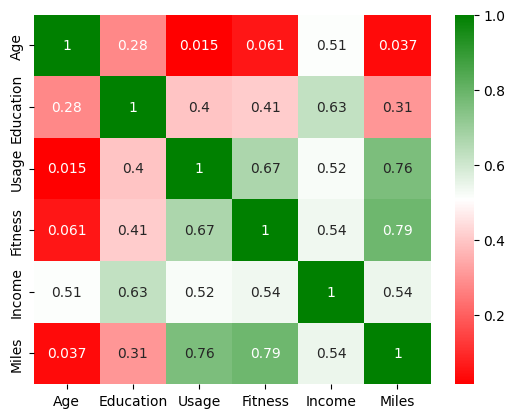

In [ ]:
sns.heatmap(df[['Age','Education','Usage','Fitness','Income','Miles']].corr(),annot=True, cmap=cmap)

* Miles run are highly correllated with Fitness and Usage(Obvious), Meaning that the more the Miles ran, the more the Fitness.
* Interestingly, Income and Education and highly related
* More interestingly, Age is not highly related to Miles, giving an indication that Age has not role to Miles or Fitness, you can exercise at any age
* And Education also seem to have not correlation to Miles and Usage, need for health conciousness irrespective of Education
